## Single detector

In [1]:
import numpy as np
from pycbc.detector import Detector

/home/lucky/anaconda3/lib/python3.12/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


### Checking for the convergence of the value of the volume

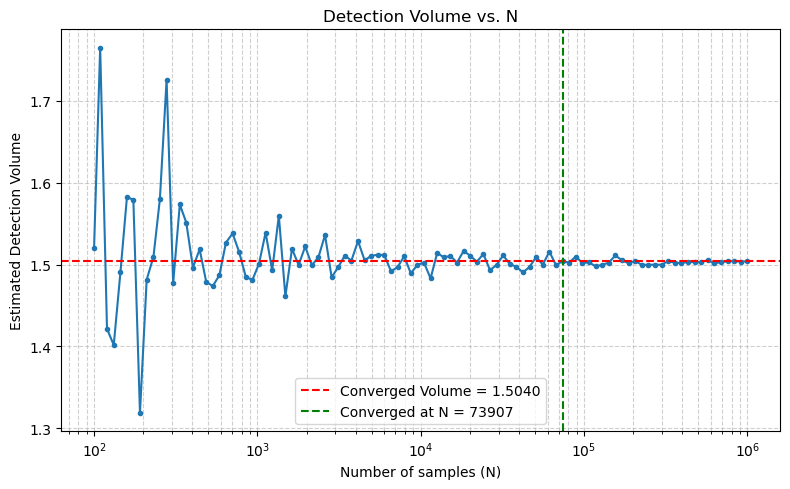

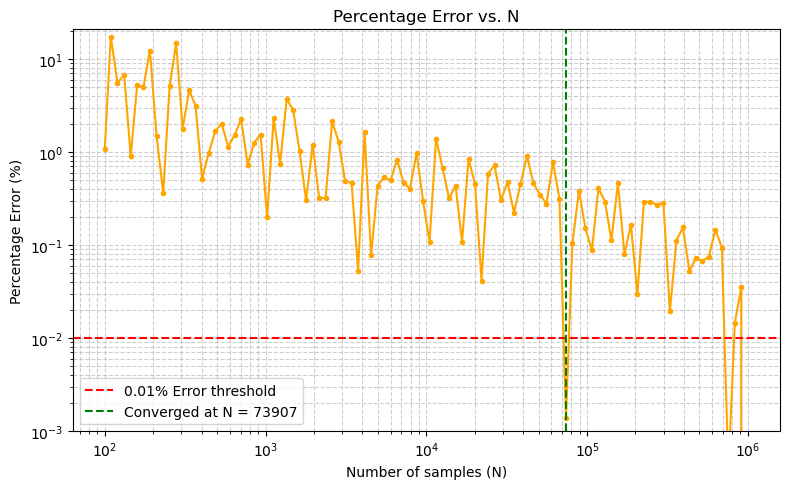

Converged at N = 73907
Percentage error = 0.001389466%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, LogLocator
from pycbc.detector import Detector

pol = 0
t = 10**8
d = Detector("H1")

error_threshold = 0.01  #in percent

N_values = np.logspace(2, 6, num=100, dtype=int)
volumes = []

# Monte Carlo volume estimation
for N in N_values:
    alpha = np.random.uniform(-1, 1, N)
    phi = np.random.uniform(0, 2 * np.pi, N)
    theta = np.pi / 2 - np.arccos(alpha)

    fp, fc = d.antenna_pattern(theta, phi, pol, t)
    P = fp**2 + fc**2

    I = (4 * np.pi) * np.mean(P**(3/2))      #just the integral, not including the constant factor outside integral.
    V = I / 3
    volumes.append(V)

V_ref = volumes[-1]

#percentage errors
errors = [100 * abs(v - V_ref) / V_ref for v in volumes]

#convergence point
N_converged = None
V_converged = None
for i, err in enumerate(errors):
    if err < error_threshold:
        N_converged = N_values[i]
        V_converged = volumes[i]
        break

#Volume vs N
plt.figure(figsize=(8, 5))
plt.plot(N_values, volumes, marker='.')
if N_converged:
    plt.axhline(V_converged, color='red', linestyle='--', label=f"Converged Volume = {V_converged:.4f}")
    plt.axvline(N_converged, color='green', linestyle='--', label=f"Converged at N = {N_converged}")
plt.xscale('log')
plt.xlabel("Number of samples (N)")
plt.ylabel("Estimated Detection Volume")
plt.title("Detection Volume vs. N")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Percentage Error vs N
plt.figure(figsize=(8, 5))
plt.plot(N_values, errors, marker='.', color='orange')
plt.axhline(error_threshold, color='red', linestyle='--', label=f"{error_threshold}% Error threshold")
if N_converged:
    plt.axvline(N_converged, color='green', linestyle='--', label=f"Converged at N = {N_converged}")
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, max(errors)*1.2)  # set lower limit to 1e-3, upper limit slightly above max
plt.xlabel("Number of samples (N)")
plt.ylabel("Percentage Error (%)")
plt.title("Percentage Error vs. N")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

if N_converged:
    print(f"Converged at N = {N_converged}")
    print(f"Percentage error = {errors[N_values.tolist().index(N_converged)]:.9f}%")
else:
    print("Convergence threshold not met.")
